In [7]:
import os
import re
import sys
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from invisible_cities.database  import load_db
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer
%config InlineBackend.figure_format = 'svg'


In [8]:
# Load in the database information
# Configure the detector database
detector_db = "new"
datapmt = load_db.DataPMT(detector_db, 0)
xpmt, ypmt = datapmt["X"].values, datapmt["Y"].values
sensorids  = datapmt["SensorID"].values
pmt = "PmtR11410"

S1 Table validation plots

In [9]:
# Load in the table
lt     = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "LightTable")
# err    = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "Error")
config = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "Config")

# lt     = load_dst("NEW-MC_S1_LT_10mm.h5", "LT", "LightTable")
# err    = load_dst("NEW-MC_S1_LT_10mm.h5", "LT", "Error")
# config = load_dst("NEW-MC_S1_LT_10mm.h5", "LT", "Config")

NoSuchNodeError: group ``/LT`` does not have a child named ``Error``

In [ ]:
xmin=-210
xmax=210
xbw=20

zmin=0
zmax=510
zbw=10

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

[ 10.  30.  50.  70.  90. 110. 130. 150. 170. 190. 210. 230. 250. 270.
 290. 310. 330. 350. 370. 390. 410. 430. 450. 470. 490. 510.]


NameError: name 'err' is not defined

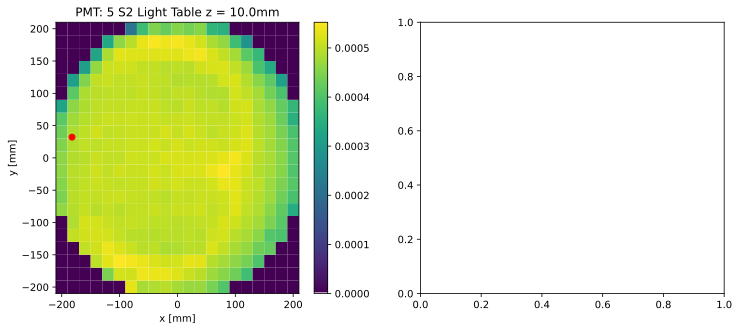

In [ ]:
# Plot the slices across all z bins

sensor_id = 5
sid =sensor_id
sensor_name = "PmtR11410_"+str(sensor_id)


n = 20

print(lt.z.unique())

df = lt

for index, z in enumerate(df.z.unique()):
    if (index >= n): break

    sel = df.z == z

    # Make the LT plot and error plot in one
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
    # fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

    # light table
    # h, _, _ = np.histogram2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins])
    # im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
    counts0, xedges0, yedges0, im0 = ax0.hist2d(lt[sel]["x"], lt[sel]["y"], weights=lt[sel][sensor_name], bins=[xbins, ybins])
    ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    ax0.set_title(f"PMT: {sensor_id} S2 Light Table z = {z}mm")
    ax0.set_xlabel("x [mm]")
    ax0.set_ylabel("y [mm]")
    fig.colorbar(im0, ax=ax0)

    # err
    # h, _, _ = np.histogram2d(err[sel]["x"], err[sel]["y"], weights=err[sel][sensor_name], bins=[xbins, ybins])
    # im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])

    counts1, xedges1, yedges1, im1 = ax1.hist2d(err[sel]["x"], err[sel]["y"], weights=err[sel][sensor_name], bins=[xbins, ybins])

    ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc. z = {z}mm")
    ax1.set_xlabel("x [mm]")
    ax1.set_ylabel("y [mm]")
    ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
    fig.colorbar(im1, ax=ax1)


S2 Table validation plots

In [10]:
# Load in the table
lt     = load_dst("NEW-MC_S2_LT.h5", "LT", "LightTable")
err    = load_dst("NEW-MC_S2_LT.h5", "LT", "Error")
config = load_dst("NEW-MC_S2_LT.h5", "LT", "Config")

bv=10

lt_mesh     = load_dst(f"NEW-MC_S2_LT_mesh.h5", "LT", "LightTable")
err_mesh    = load_dst(f"NEW-MC_S2_LT_mesh.h5", "LT", "Error")
config_mesh = load_dst(f"NEW-MC_S2_LT_mesh.h5", "LT", "Config")

In [11]:
# Set the binning
xmin=-210
xmax=210
xbw=bv

zmin=-10
zmax=0
zbw=10

xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = xbins
zbins = np.arange(zmin, zmax+zbw, zbw)

xbins_centre = np.arange(xmin+xbw/2, xmax+xbw/2, xbw)
ybins_centre = xbins_centre
zbins_centre = np.arange(zmin+zbw/2, zmax+zbw/2, zbw)

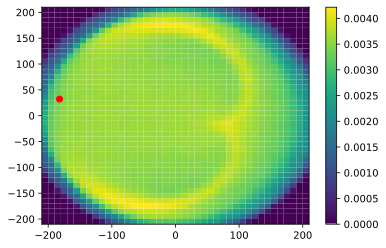

In [12]:
# Plot the slices across all z bins

sensor_id = 5
sid = sensor_id

sensor_name = "PmtR11410_"+str(sensor_id)

df = lt

fig, ax = plt.subplots()
counts, xedges, yedges, im = ax.hist2d(df.x, df.y, weights=df[pmt + f"_{sid}"], bins=[xbins, ybins])
plt.scatter(datapmt[datapmt["SensorID"]==sid].X, datapmt[datapmt["SensorID"]==sid].Y, c="r")
plt.colorbar(im, ax=ax)
plt.savefig(f"S2_LT_{bv}mm_bins_s.pdf")

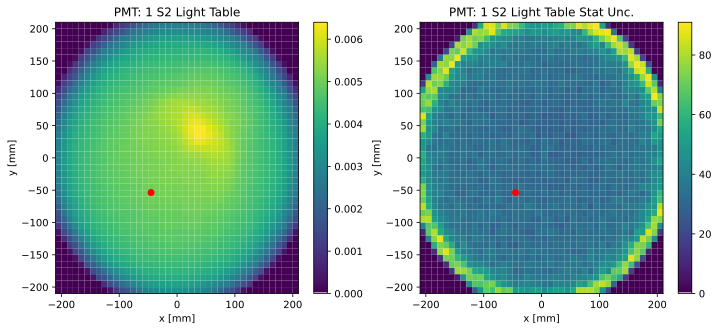

In [75]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[12, 5])
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# light table
# h, _, _ = np.histogram2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins])
# im0 = ax0.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]])
counts0, xedges0, yedges0, im0 = ax0.hist2d(lt["x"], lt["y"], weights=lt[sensor_name], bins=[xbins, ybins])

ax0.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax0.set_title(f"PMT: {sensor_id} S2 Light Table")
ax0.set_xlabel("x [mm]")
ax0.set_ylabel("y [mm]")
fig.colorbar(im0, ax=ax0)

# err
# h, _, _ = np.histogram2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins])
# im1 = ax1.imshow(np.flip(h.T, axis=0), extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], cmap='inferno', vmax=25, vmin=0)

counts1, xedges1, yedges1, im1 = ax1.hist2d(err["x"], err["y"], weights=err[sensor_name], bins=[xbins, ybins])
ax1.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc.")
ax1.set_xlabel("x [mm]")
ax1.set_ylabel("y [mm]")
ax1.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
fig.colorbar(im1, ax=ax1)

plt.savefig(f"S2_LT_{bv}mm_bins.pdf")


0.007746798883577757


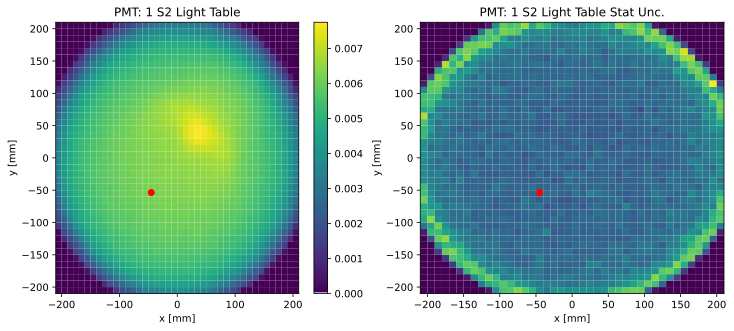

In [76]:
sensor_id = 1
sensor_name = "PmtR11410_"+str(sensor_id)


# Make the LT plot and error plot in one
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=[12, 5])

# light table
counts3, xedges3, yedges3, im3 = ax3.hist2d(lt_mesh["x"], lt_mesh["y"], weights=lt_mesh[sensor_name], bins=[xbins, ybins])

ax3.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
ax3.set_title(f"PMT: {sensor_id} S2 Light Table")
ax3.set_xlabel("x [mm]")
ax3.set_ylabel("y [mm]")
fig.colorbar(im3, ax=ax3)

print(max(counts3.flatten()))

# err
counts4, xedges4, yedges4, im4 = ax4.hist2d(err_mesh["x"], err_mesh["y"], weights=err_mesh[sensor_name], bins=[xbins, ybins])
ax4.set_title(f"PMT: {sensor_id} S2 Light Table Stat Unc.")
ax4.set_xlabel("x [mm]")
ax4.set_ylabel("y [mm]")
ax4.scatter(xpmt[sensor_id], ypmt[sensor_id], c="r")
fig.colorbar(im1, ax=ax1)

plt.savefig(f"S2_LT_{bv}mm_bins_mesh.pdf")


/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


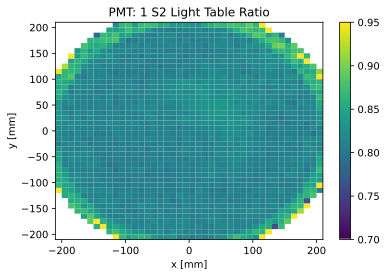

In [77]:
# Plot the ratio
fig = plt.figure()
ax=fig.add_subplot(111)
pc = plt.pcolormesh(xedges, yedges, (counts0/counts3).T, vmin = 0.7, vmax = 0.95)
plt.title(f"PMT: {sensor_id} S2 Light Table Ratio")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
fig.colorbar(pc)

[0. 0. 0. ... 0. 0. 0.]


/Users/mistryk2/opt/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, 'Counts')

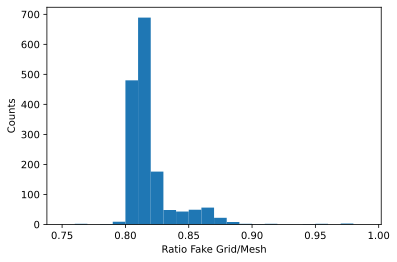

In [78]:
# Make a 1D histogram of the ratio
data = (counts0/counts3).flatten()
data = np.nan_to_num(data)
print(data)

plt.hist(data, bins = np.arange(0.75, 1., 0.01))
plt.xlabel("Ratio Fake Grid/Mesh")
plt.ylabel("Counts")

In [ ]:
# lt     = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "LightTable")
# err    = load_dst("../LT/NEW-MC_S2_LT.h5", "LT", "Error")
config = load_dst("../LT/NEW-MC_S1_LT.h5", "LT", "Config")
# plt.figure()
# plt.hist(lt[sensor_name], bins=100)
# # plt.xlim(0,25)
# plt.xlim(0,0.0006)
# plt.show()

# lt     = load_dst("../LT/PSF.h5", "PSF", "LightTable")
lt     = load_dst("../../NEXT100Production/LightTables/NEXT100_S1_LT.h5", "LT", "Config")

display(lt.head(100))
display(config)



,parameter,value
0,detector,next100
1,ACTIVE_rad,492.0
2,EL_GAP,10.0
3,signal_type,S1
4,sensor,PmtR11410
5,pitch_x,65.33
6,pitch_y,65.33
7,pitch_z,20.0
8,nexus,v7_01_00(+ G4 op bug)


,parameter,value
0,detector,new
1,ACTIVE_rad,208.0
2,EL_GAP,6.0
3,table_type,energy
4,signal_type,S1
5,sensor,PmtR11410
6,pitch_x,10
7,pitch_y,10
